In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [3]:
tickers = ['WMT', 'TGT', 'BBY', 'SPY']
merged = False
for i in tickers:
    finance_data = yf.Ticker(i)
    data = finance_data.history(intervel="1mo",period="max")
    
    data.reset_index(inplace=True)
    data[i] = (data['Close']/data['Close'].shift(1)) - 1
    data.to_csv(i +".csv")
    data = data[['Date',  i]]
    data.set_index('Date', inplace = True)
    if merged:
        all_data = pd.concat([all_data, data], axis = 1)
    else:
        all_data = data
        merged = True
all_data.dropna(inplace=True)

In [4]:
all_data.describe().transpose()
all_data.to_csv("all_data.csv")

In [5]:
all_data.corr().style.background_gradient(cmap='viridis', axis=None).set_precision(2)

,WMT,TGT,BBY,SPY
WMT,1.00,0.53,0.29,0.51
TGT,0.53,1.00,0.39,0.54
BBY,0.29,0.39,1.00,0.43
SPY,0.51,0.54,0.43,1.00


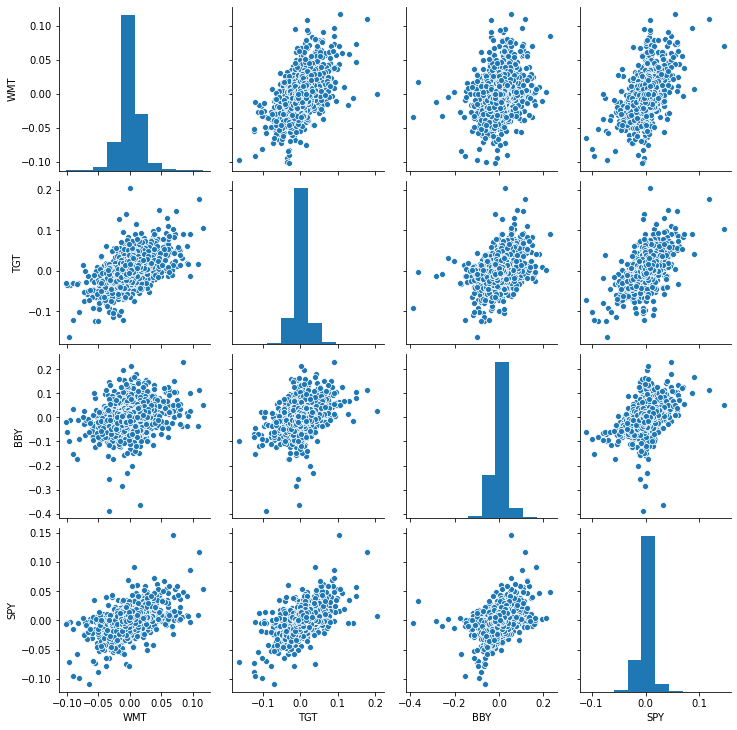

In [6]:
# library & dataset
import seaborn as sns

sns.pairplot(all_data)
plt.show()

intercept: -0.000740474680697054
Slope [1.04662814]
Coefficient of determination: 0.19


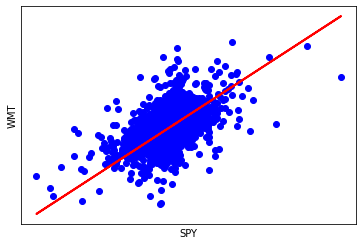

intercept: 0.00014780278863888753
Slope [0.77942348]
Coefficient of determination: 0.30


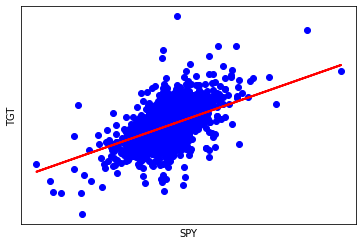

intercept: -0.0004613585576817476
Slope [0.95908325]
Coefficient of determination: 0.21


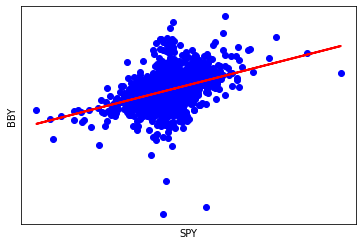

intercept: 1.0842021724855044e-19
Slope [1.]
Coefficient of determination: 1.00


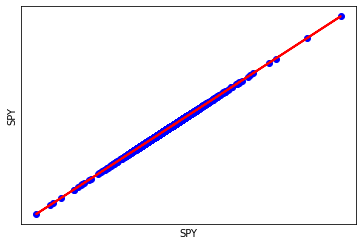

In [9]:
for i in tickers:

    # Split the data into training/testing sets
    X_train = np.array(all_data['SPY'][:-6000]).reshape(-1,1)
    X_test = np.array(all_data['SPY'][-6000:]).reshape(-1,1)

    # Split the targets into training/testing sets
    Y_train = np.array(all_data[i][:-6000])
    Y_test = np.array(all_data[i][-6000:])

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Make predictions using the testing set
    Y_pred = regr.predict(X_test)

    # The coefficients
    print('intercept:', regr.intercept_)
    print('Slope', regr.coef_)

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(Y_test, Y_pred))

    # Plot outputs
    plt.scatter(X_test, Y_test,  color='blue')
    plt.plot(X_test, Y_pred, color='red', linewidth=2)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('SPY')
    plt.ylabel(i)
    plt.show()

In [8]:
all_data

,WMT,TGT,BBY,SPY
Date,,,,
1993-02-01,0.011516,0.016078,0.018518,0.007112
1993-02-02,0.005693,0.018987,-0.012121,0.002118
1993-02-03,0.009434,0.026397,0.015337,0.010571
1993-02-04,-0.003739,0.013615,0.108761,0.004184
1993-02-05,-0.011257,-0.010447,0.013624,-0.000694
...,...,...,...,...
2020-12-24,0.001955,0.001601,0.002052,0.003890
2020-12-28,0.011986,0.006850,0.000293,0.008591
2020-12-29,-0.006335,-0.007654,-0.017742,-0.001908


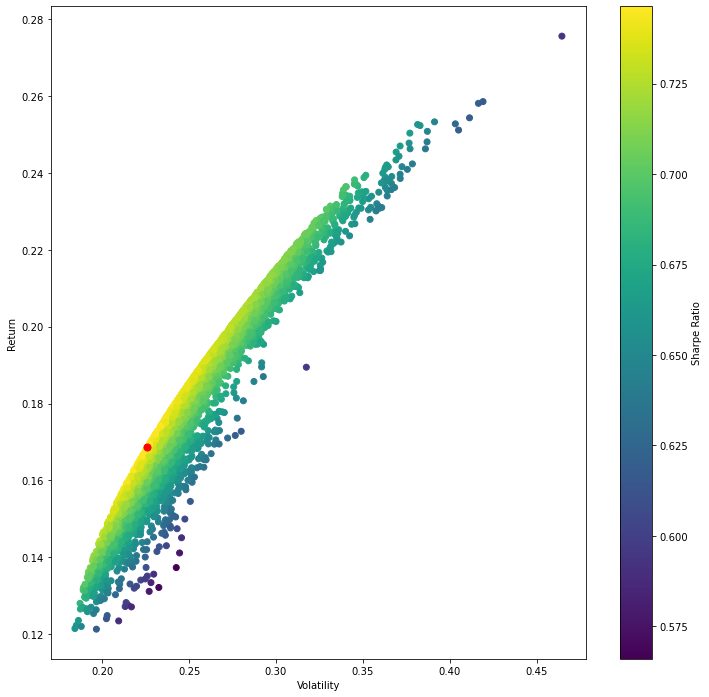

Max Sharpe Ratio is 0.7463709166269151
Max Sharpe Ratio is in location 1173


In [10]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(all_data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (all_data.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(all_data.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    
    
plt.figure(figsize=(12,12))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()
print('Max Sharpe Ratio is {}' .format(sharpe_arr.max()))
print('Max Sharpe Ratio is in location {}' .format(sharpe_arr.argmax()))      

In [11]:
all_weights[1173]

array([0.15746351, 0.23821173, 0.20165745, 0.40266731])

In [12]:
tickers

['WMT', 'TGT', 'BBY', 'SPY']

In [13]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "TITAN.NS ITC.NS  WIPRO.NS",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "10y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1mo",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  3 of 3 completed


In [32]:

tickers = ['WIPRO.NS','ITC.NS','WIPRO.NS']
merged = False
for i in tickers:
    finance_data = yf.Ticker(i)
    data = finance_data.history(intervel="1mo",period="max")
    
    data.reset_index(inplace=True)
    data[i] = (data['Close']/data['Close'].shift(1)) - 1
    data.to_csv(i +".csv")
    data = data[['Date',  i]]
    data.set_index('Date', inplace = True)
    if merged:
        i_data = pd.concat([i_data, data], axis = 1)
    else:
        i_data = data
        merged = True
i_data.dropna(inplace=True)

In [33]:
i_data


,WIPRO.NS,ITC.NS,WIPRO.NS
Date,,,
1996-01-02,-0.077778,-0.037811,-0.077778
1996-01-03,0.036144,-0.032058,0.036144
1996-01-04,0.000000,0.018804,0.000000
1996-01-09,0.000000,-0.002644,0.000000
1996-01-10,0.001395,-0.003315,0.001395
...,...,...,...
2020-12-28,0.001831,0.004314,0.001831
2020-12-29,0.005484,0.009785,0.005484
2020-12-30,-0.001558,-0.001891,-0.001558


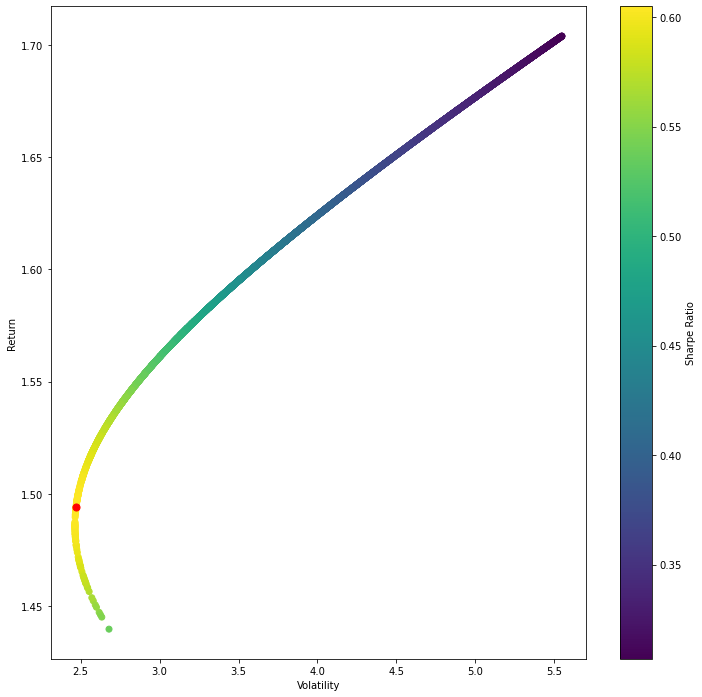

Max Sharpe Ratio is 0.6048541660444846
Max Sharpe Ratio is in location 4275


In [42]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(i_data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(3))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (i_data.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(i_data.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    
    
plt.figure(figsize=(12,12))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()
print('Max Sharpe Ratio is {}' .format(sharpe_arr.max()))
print('Max Sharpe Ratio is in location {}' .format(sharpe_arr.argmax()))

In [43]:
all_weights[4275]

array([0.1989282 , 0.77718151, 0.02389029])